In [250]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [251]:
df = pd.read_csv(r'data/train.csv')

In [252]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [253]:
print(len(df))
print(len(df['ID'].unique()))

19237
18924


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [255]:
(df['Levy'] == '-').sum()

np.int64(5819)

In [256]:
df['Levy'] = (
    df['Levy']
    .str.replace(" ", "", regex=False)  
    .replace("-", None)                
    .replace("", None)                
)
df['Levy'] = pd.to_numeric(df['Levy'], errors="coerce") 

In [257]:
df['Levy'] = df['Levy'].fillna(round(df['Levy'].mean(), 2))

In [258]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.00,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.00,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,906.84,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.00,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.00,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [259]:
df['Prod. year'].isna().sum()

np.int64(0)

In [260]:
df['Leather interior'] = (
    df['Leather interior']
    .str.strip()
    .replace({"Yes": True, "No": False})
)

C:\Users\karol\AppData\Local\Temp\ipykernel_26340\2889558165.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Yes": True, "No": False})


In [261]:
df['Leather interior'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19237 entries, 0 to 19236
Series name: Leather interior
Non-Null Count  Dtype
--------------  -----
19237 non-null  bool 
dtypes: bool(1)
memory usage: 18.9 KB


In [262]:
df['Turbine'] = df['Engine volume'].str.lower().str.contains("turbo", na=False)

In [263]:
df['Engine volume'] = (
    df['Engine volume']
    .str.strip()
    .str.lower()
    .str.replace("turbo", "", regex=False)  
)

df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors="coerce")

In [264]:
df['Engine volume'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19237 entries, 0 to 19236
Series name: Engine volume
Non-Null Count  Dtype  
--------------  -----  
19237 non-null  float64
dtypes: float64(1)
memory usage: 150.4 KB


In [265]:
df['Mileage'] = (
    df['Mileage']
    .str.strip()
    .str.lower()
    .str.replace("km", "", regex=False)  
)

df['Mileage'] = pd.to_numeric(df['Mileage'], errors="coerce")

In [266]:
df['Mileage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19237 entries, 0 to 19236
Series name: Mileage
Non-Null Count  Dtype
--------------  -----
19237 non-null  int64
dtypes: int64(1)
memory usage: 150.4 KB


In [267]:
df['Cylinders'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19237 entries, 0 to 19236
Series name: Cylinders
Non-Null Count  Dtype  
--------------  -----  
19237 non-null  float64
dtypes: float64(1)
memory usage: 150.4 KB


In [268]:
df['Airbags'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19237 entries, 0 to 19236
Series name: Airbags
Non-Null Count  Dtype
--------------  -----
19237 non-null  int64
dtypes: int64(1)
memory usage: 150.4 KB


In [269]:
len(df['Model'].unique())

1590

In [270]:
df['Model'] = df['Model'].str.lower().str.strip()
len(df['Model'].unique())

1511

In [271]:
df.drop(columns=['Wheel', 'Doors', 'Gear box type'], inplace=True)

In [272]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Drive wheels,Color,Airbags,Turbine
0,45654403,13328,1399.00,LEXUS,rx 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,4x4,Silver,12,False
1,44731507,16621,1018.00,CHEVROLET,equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,4x4,Black,8,False
2,45774419,8467,906.84,HONDA,fit,2006,Hatchback,False,Petrol,1.3,200000,4.0,Front,Black,2,False
3,45769185,3607,862.00,FORD,escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,4x4,White,0,False
4,45809263,11726,446.00,HONDA,fit,2014,Hatchback,True,Petrol,1.3,91901,4.0,Front,Silver,4,False


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  bool   
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Drive wheels      19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
 15  Turbine           19237 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object

In [274]:
df = df.drop(df['Price'].idxmax())

In [275]:
df_sorted = df.sort_values(by="Mileage", ascending=False)

df = df_sorted.iloc[100:]

In [276]:
group_cols = ["Price", "Manufacturer", "Model", "Prod. year", "Fuel type"]

def drop_similar(group):
    kept = []
    last_mileage = None

    for i, row in group.iterrows():
        if last_mileage is None:
            kept.append(row)
            last_mileage = row["Mileage"]
        else:
            if abs(row["Mileage"] - last_mileage) <= 10000:
                continue
            else:
                kept.append(row)
                last_mileage = row["Mileage"]

    return pd.DataFrame(kept)

cleaned = df.groupby(group_cols, group_keys=False).apply(drop_similar)

print(f"Original rows: {len(df)}")
print(f"After cleanup: {len(cleaned)}")

Original rows: 19136
After cleanup: 15041


C:\Users\karol\AppData\Local\Temp\ipykernel_26340\445915167.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned = df.groupby(group_cols, group_keys=False).apply(drop_similar)


In [277]:
df = cleaned

In [278]:
df["CarAge"] = 2020 - df["Prod. year"]

In [279]:
def trim_extremes(df, col, n=10):
    sorted_idx = df[col].sort_values().index
    return df.drop(sorted_idx[:n].union(sorted_idx[-n:]))

In [280]:
low, high = df['Price'].quantile([0.01, 0.99])

df_clean = df[(df['Price'] >= low) & (df['Price'] <= high)].copy()

print(f"Original rows: {len(df)}")
print(f"After cleanup: {len(df_clean)}")

Original rows: 15041
After cleanup: 14742


In [281]:
df = df_clean

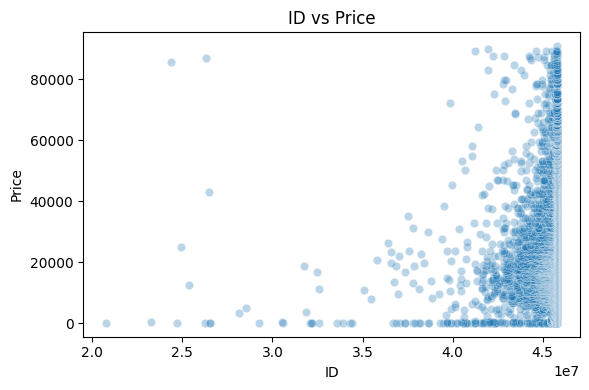

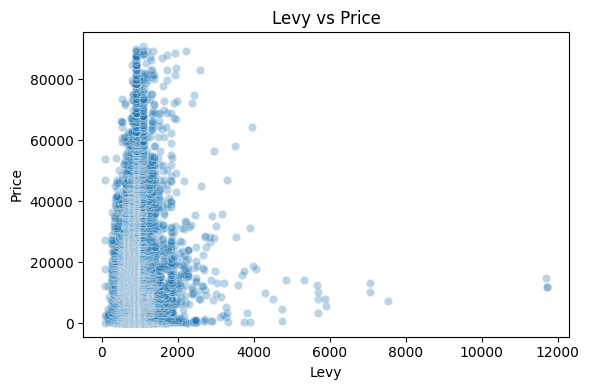

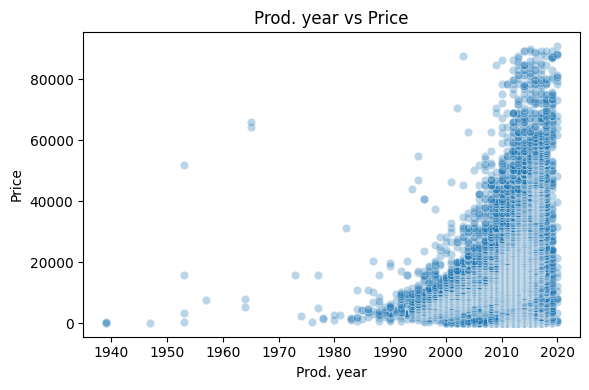

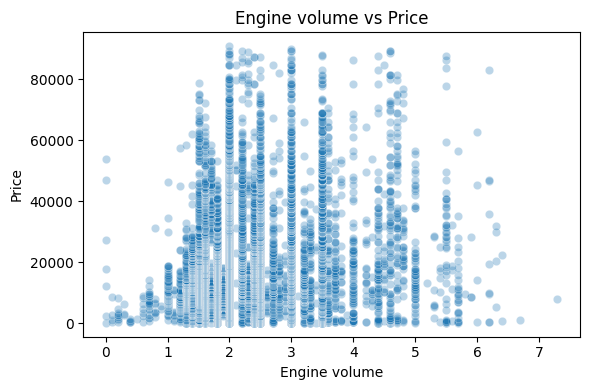

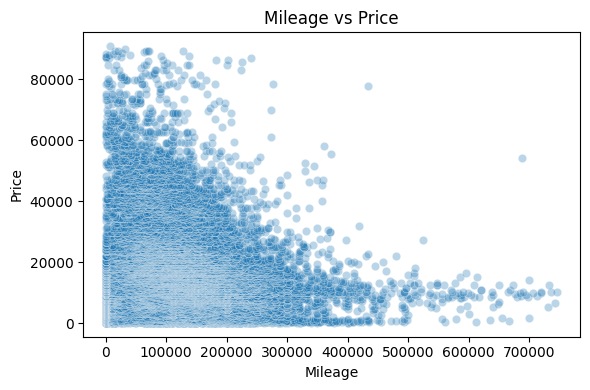

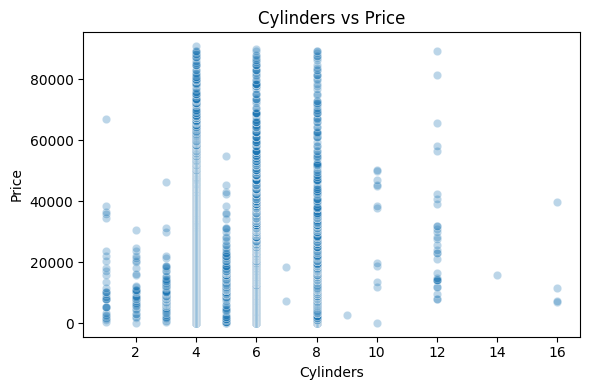

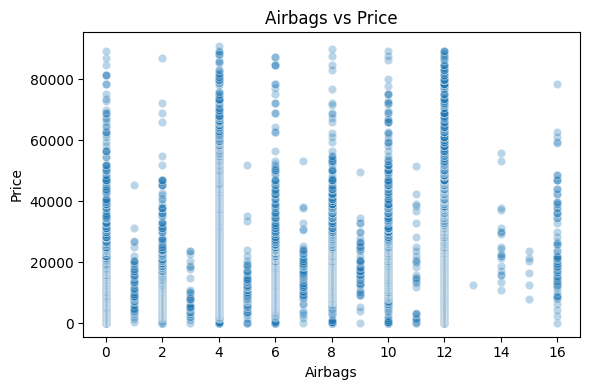

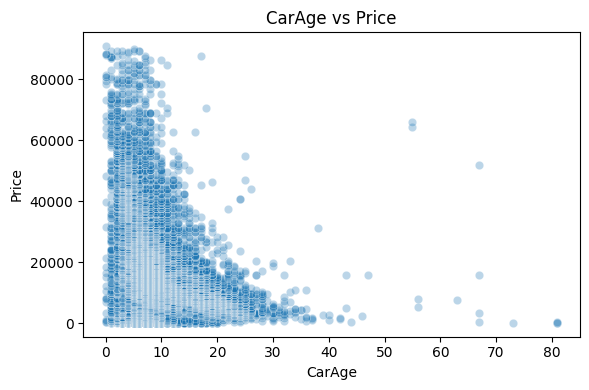

In [282]:
num_cols = df.select_dtypes(include=["number"]).columns.drop("Price")

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["Price"], alpha=0.3)
    plt.title(f"{col} vs Price")
    plt.tight_layout()
    plt.show()

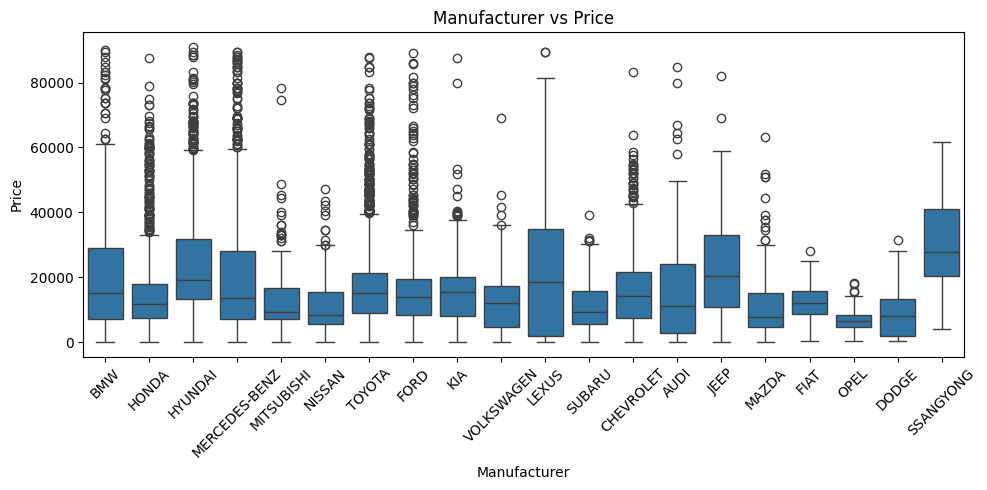

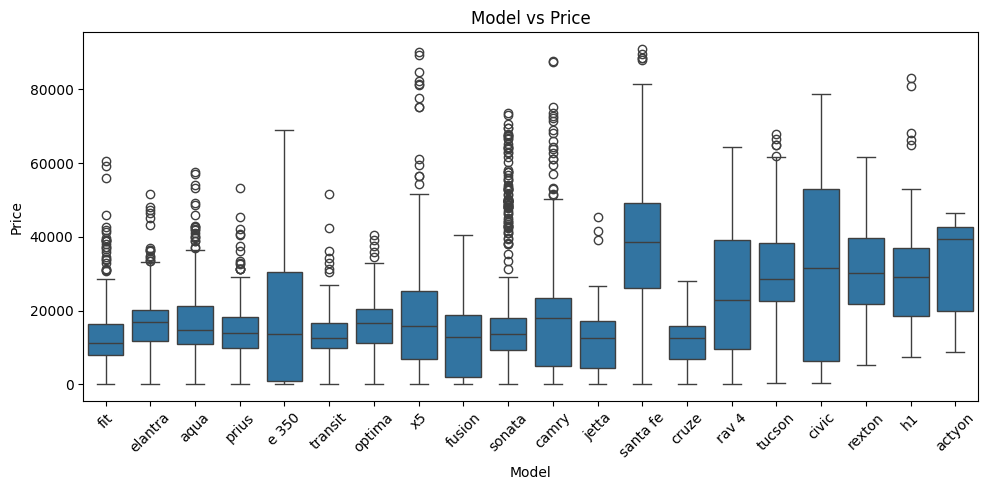

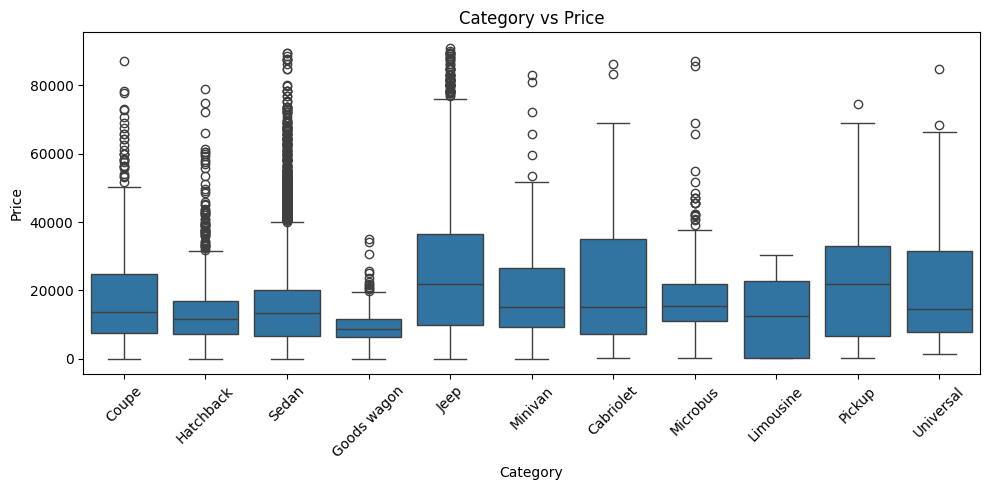

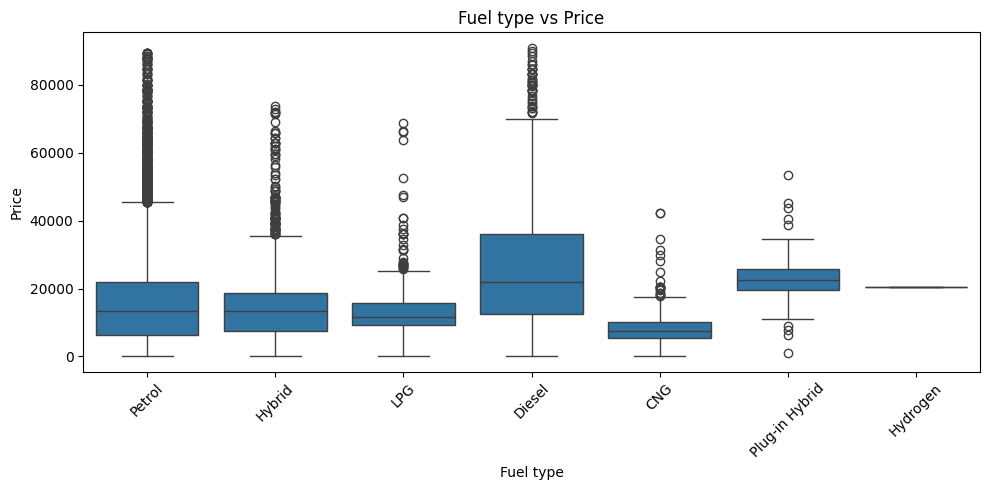

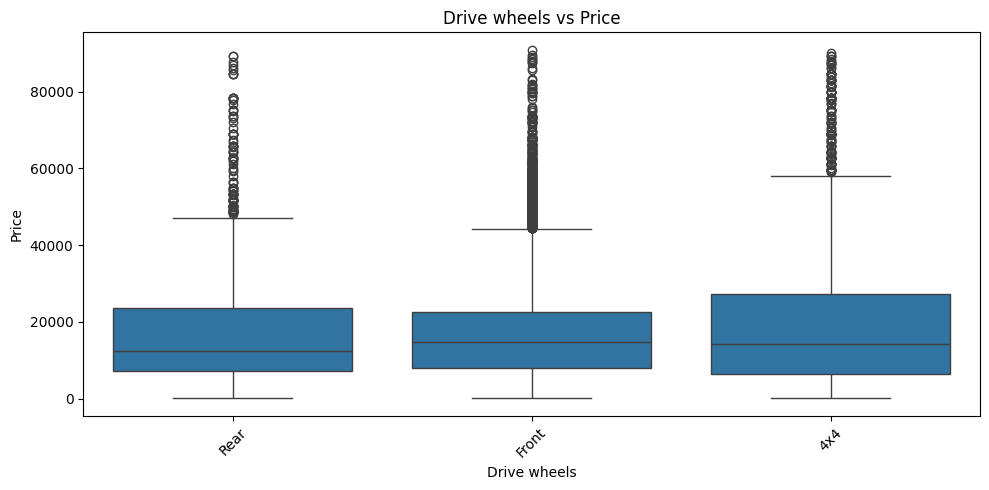

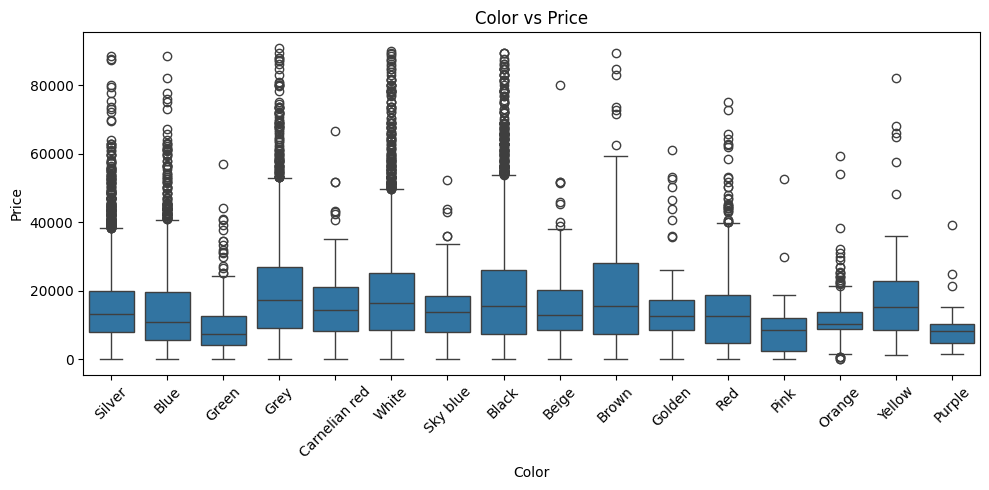

In [283]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    plt.figure(figsize=(10,5))
    if df[col].nunique() > 20:
        top_vals = df[col].value_counts().index[:20]
        subset = df[df[col].isin(top_vals)]
    else:
        subset = df
    
    sns.boxplot(x=subset[col], y=subset["Price"])
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Price")
    plt.tight_layout()
    plt.show()

In [284]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Drive wheels,Color,Airbags,Turbine,CarAge
15675,42032006,50,906.84,BMW,318,2003,Coupe,False,Petrol,1.8,220000,4.0,Rear,Silver,8,False,17
15718,45750149,50,906.84,HONDA,fit,2005,Hatchback,False,Petrol,1.3,150000,4.0,Front,Silver,2,False,15
4505,45750142,50,906.84,HONDA,fit,2006,Hatchback,False,Petrol,1.3,14000,4.0,Front,Blue,2,False,14
17391,40680655,50,906.84,HONDA,fit,2007,Sedan,True,Petrol,1.3,10000,4.0,Front,Blue,4,False,13
6557,38132502,50,906.84,HONDA,fit,2012,Sedan,False,Hybrid,1.5,80000,4.0,Front,Green,0,False,8


In [285]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Drive wheels,Color,Airbags,Turbine,CarAge
15586,45188389,89379,1079.00,MERCEDES-BENZ,e 300,2018,Sedan,True,Petrol,2.0,21000,4.0,Rear,Black,0,True,2
13330,41228647,89379,906.84,MERCEDES-BENZ,ml 300,2015,Jeep,True,Petrol,3.0,66000,12.0,4x4,Black,10,True,5
7590,45732367,89482,1176.00,HYUNDAI,santa fe,2019,Jeep,True,Diesel,2.2,69852,4.0,Front,Grey,4,False,1
15486,41976837,90006,906.84,BMW,x5,2015,Jeep,True,Diesel,3.0,31100,6.0,4x4,White,8,True,5
4077,45802851,90919,1076.00,HYUNDAI,santa fe,2020,Jeep,True,Diesel,2.0,6631,4.0,Front,Grey,4,False,0


RandomForest Metrics
- R²: 0.49254404831233
- RMSE: 10528.508309882931

Feature importances:
Mileage          0.242639
Model            0.232107
CarAge           0.229120
Levy             0.144050
Engine volume    0.129516
Cylinders        0.022568
dtype: float64


C:\Users\karol\AppData\Local\Temp\ipykernel_26340\3045923470.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="Blues_d")


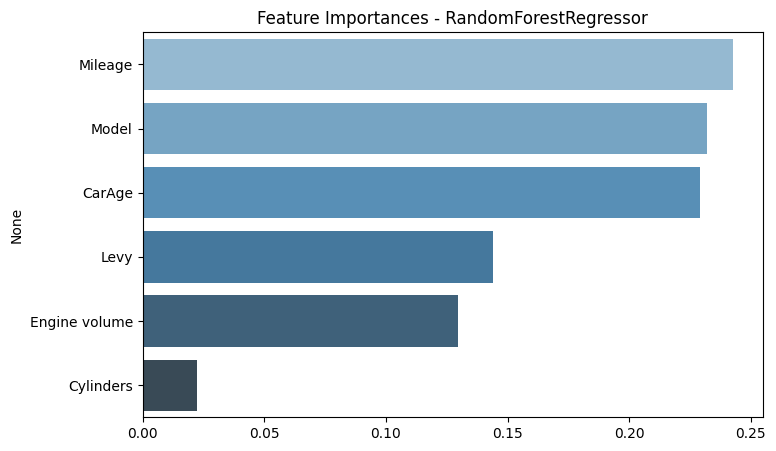

In [286]:
features = ["Levy", "CarAge", "Engine volume", "Mileage", "Cylinders", "Model"]
X = df[features].copy()
y = df["Price"]

le = LabelEncoder()
X["Model"] = le.fit_transform(X["Model"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    n_estimators=300,    
    max_depth=None,     
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("RandomForest Metrics")
print("- R²:", r2_score(y_test, y_pred))
print("- RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature Importance Plot
feat_imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature importances:")
print(feat_imp)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="Blues_d")
plt.title("Feature Importances - RandomForestRegressor")
plt.show()

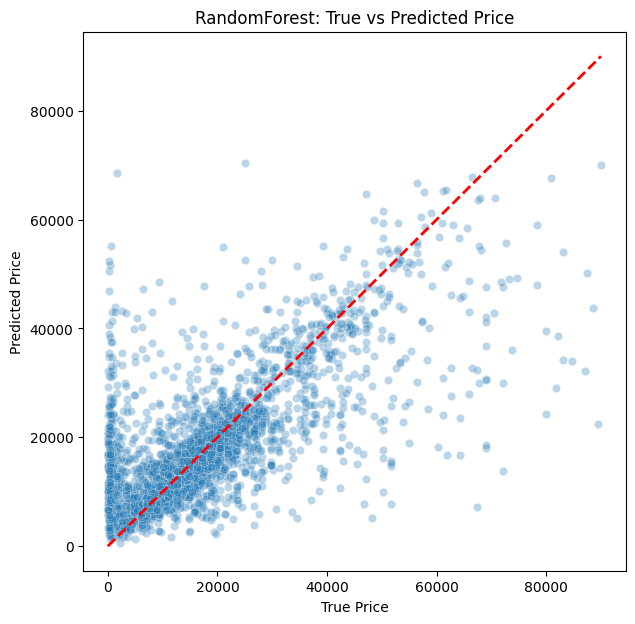

In [287]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--', lw=2)

plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("RandomForest: True vs Predicted Price")
plt.show()

In [288]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [289]:
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)